 # 1. Business Understanding

**Project goal:** Help the company decide which aircraft types to purchase by identifying the lowest-risk aircraft using National Transportation Safety Board  accident data (1962–2023).

This analysis can help reveal:
- Which aircraft model have lower risks. 
- Which years had the most accidents. 
- What injuries are frequent.  
- Whether accidents are decreasing or increasing over time. 



# 2. Data Understanding
The goal is to load the data and explore the data to understand it's shape(how many columns and rows it contains), summary statistics, duplicates missing values and the information of the data.

In [117]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# load the dataset
df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)
# Display the first 5 rows of the dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [119]:
# Get the shape of the dataframe(How many rows and columns)
df.shape

(88889, 31)

In [120]:
# Get information about the dataframe including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [121]:
# Get statistical summary of numerical columns in the dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [122]:
df.duplicated().sum()

0

In [123]:
df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

Text(0.5, 1.0, 'Missing Values Heatmap')

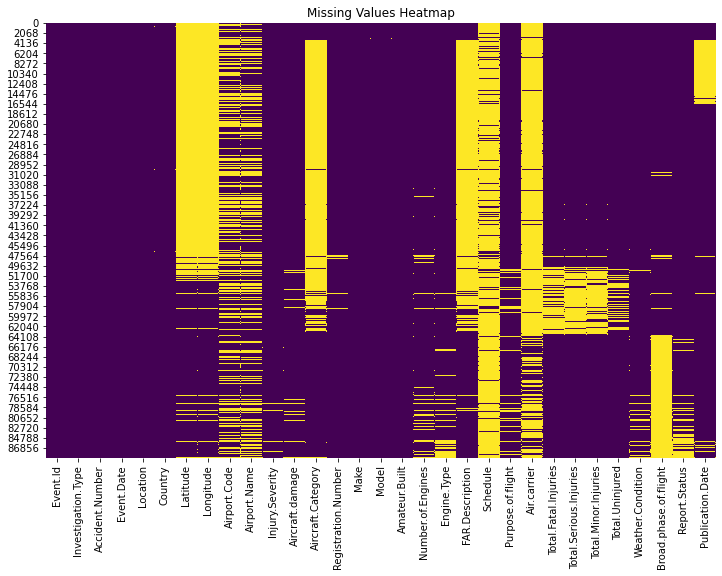

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')

# 3. Data Preparation

In this section, I will prepare the aviation accident dataset for analysis.  
The goal of data preparation is to clean only the columns needed to answer the business question:

**“Which aircraft has the lowest risk for the company to purchase?”**  

Only the features related to aircraft safety, aircraft type, and flight characteristics are cleaned.


### 3.1 Dropping and handling missing values

In [125]:
# 1. DROP UNNECESSARY COLUMNS
columns_to_drop = [
    'Publication.Date', 'Report.Status', 'Airport.Code','Air.carrier'
    'Latitude', 'Longitude', 'Airport.Name', 'FAR.Description',
    'Schedule', 'Registration.Number'
]

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# 2. HANDLE MISSING VALUES

# Fill categorical columns with "Unknown"

categorical_unknown = [
    'Make', 'Model', 'Engine.Type', 'Aircraft.Category',
    'Broad.phase.of.flight', 'Weather.Condition', 'Country', 'injury.Severity', 'Aircraft.damage'
]

for col in categorical_unknown:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Fill numeric injury columns with 0
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]

for col in injury_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Fill number of engines with mode
if 'Number.of.Engines' in df.columns:
    df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0])



### 3.2 Stripping all string columns 

In [126]:
# Select all columns with 'object' dtype (strings)
object_cols = df.select_dtypes(include=['object']).columns

# Apply the strip operation to all of them
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())
# Verify that leading/trailing spaces are removed
df[object_cols].head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,Reciprocating,Personal,NaN,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,Reciprocating,Personal,NaN,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,Fatal(3),Destroyed,Unknown,Cessna,172M,No,Reciprocating,Personal,NaN,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,Unknown,Rockwell,112,No,Reciprocating,Personal,NaN,IMC,Cruise
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,Unknown,Cessna,501,No,Unknown,Personal,NaN,VMC,Approach


### 3.3 Converting Data Types

In [127]:
# Convert 'Event.Date' to datetime objects
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Create new features from the date
df['Event_Year'] = df['Event.Date'].dt.year
df['Event_Year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: Event_Year, Length: 88889, dtype: int64

### 3.4 Checking for outliers

In [ ]:
# Sample data
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Calculate Q1, Q3, and IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

# Detect outliers
outliers = outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f'Outliers in {col}: {outliers.shape[0]}')




Outliers in Total.Uninjured: 4147


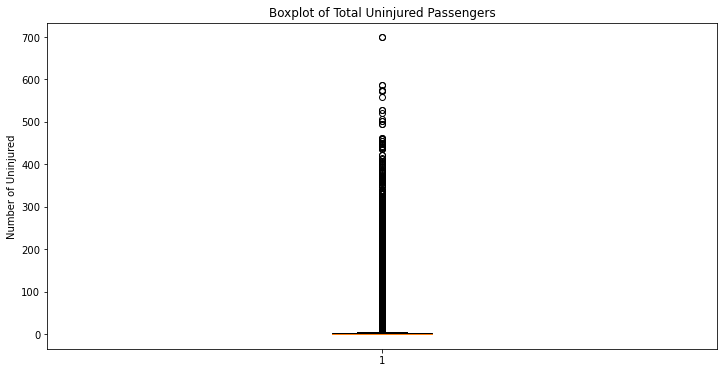

In [134]:
# Boxplot for Total Uninjured Passengers
plt.figure(figsize=(12, 6))
plt.boxplot(df['Total.Uninjured'].dropna())
plt.title('Boxplot of Total Uninjured Passengers')
plt.ylabel('Number of Uninjured')
plt.show()

### Outliers in Total.Uninjured

A large number of outliers were detected in the `Total.Uninjured` column.
These values represent accidents involving aircraft with many passengers,
particularly commercial aircraft.
The boxplot for `Total.Uninjured` variable shows a strong right-skewed distribution,
with many high values corresponding to large commercial aircraft.